In [1]:

import numpy as np
import pandas as pd 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import graphviz 
from tqdm import tqdm
import os 
import numpy as np
import matplotlib.pyplot as plt
from DecisionTree import DecisionTree
from tqdm import tqdm


In [2]:


def extract_features_and_labels(df):
    x_t = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']].to_numpy()
    y_t = df['isFraud'].to_numpy()
    return x_t, y_t

df = pd.read_csv("onlinefraud.csv").dropna().drop("nameOrig", axis=1)
# convert the dataframe to numpy arrays 
x_t,y_t=  extract_features_and_labels(df)
# spliting data into train and test for nan Balance dataset

X_train=x_t[:2000,:]
y_train=y_t[:2000]

X_test = x_t[2000:, :]
y_test = y_t[2000:]
print(x_t.shape,y_t.shape)
print(X_train.shape,y_train.shape)




(100000, 8) (100000,)
(2000, 8) (2000,)


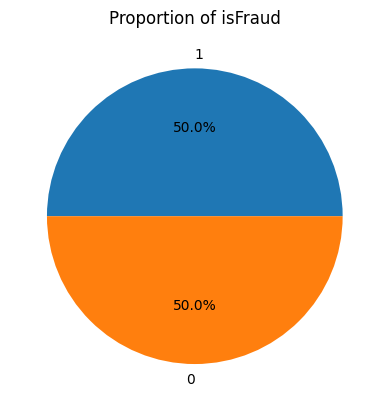

In [20]:
# spliting data into train and test for  Balance dataset
def plot_isFraud_proportion(df):
    """
    Plots a pie chart to show the proportion of isFraud in the given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to plot the proportion for.
    """
    # Calculate the proportion of isFraud
    proportion = df['isFraud'].value_counts(normalize=True)

    # Create a new figure
    fig, ax = plt.subplots()

    # Plot the pie chart
    ax.pie(proportion, labels=proportion.index, autopct='%1.1f%%')

    # Set the title and show the plot
    ax.set_title('Proportion of isFraud')
    plt.show()
    
df_froud = df[df['isFraud'] == 1].sample(frac = 1)
df_not_froud= df_2 = df[df['isFraud'] == 0].sample(frac = 1)
leng=int(len(df_froud)/2)
df_train=pd.concat([df_froud.iloc[:leng],df_not_froud.iloc[:leng]])
df_test=pd.concat([
    df_froud.iloc[leng:],df_not_froud.iloc[leng:]
])

plot_isFraud_proportion(df_train)
plt.show()
X_train,y_train= extract_features_and_labels(df_train)
X_test,y_test =extract_features_and_labels(df_test)


In [21]:

from DecisionTree import DecisionTree

clf = DecisionTree(max_depth=10,n_features=8,random_choice=True)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)
acc = accuracy(y_test, predictions)
print(acc)
clf.print_tree()

0.9435862858076908
Split on feature 0 <= 6:
-Split on feature 4 <= 6600948.54:
--Split on feature 2 <= 9170.0:
---Split on feature 1 <= PAYMENT:
----Split on feature 3 <= 57589.0:
-----Split on feature 5 <= M1040093935:
------Leaf node with value: 1
-----*Split on feature 6 <= 0.0:
-----*-Split on feature 7 <= 0.0:
-----*--Leaf node with value: 0
-----*-*Leaf node with value: 0
-----**Leaf node with value: 0
----*Leaf node with value: 1
---*Leaf node with value: 1
--*Leaf node with value: 1
-*Leaf node with value: 0
*Leaf node with value: 0


In [13]:
clf_gini= DecisionTree(max_depth=10,n_features=8,random_choice=True,mode="gini")
clf_gini.fit(X_train, y_train)
predictions = clf_gini.predict(X_test)
acc = accuracy(y_test, predictions)
print(acc)

0.9829492051816435


In [22]:

# Function to calculate accuracy
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

# Lists to store accuracies
accuracies_entropy = []
accuracies_gini = []

# Best classifier trackers
best_acc_entropy = 0
best_clf_entropy = None
best_acc_gini = 0
best_clf_gini = None

# Perform 100 classifications with tqdm progress bar
for _ in tqdm(range(30), desc='Classifying', unit='run'):
    # Classification using entropy
    clf_entropy = DecisionTree(max_depth=10, n_features=4, random_choice=True)
    clf_entropy.fit(X_train, y_train)
    predictions_entropy = clf_entropy.predict(X_test)
    acc_entropy = accuracy(y_test, predictions_entropy)
    accuracies_entropy.append(acc_entropy)
    
    # Keep the best classifier using entropy
    if acc_entropy > best_acc_entropy:
        best_acc_entropy = acc_entropy
        best_clf_entropy = clf_entropy

    # Classification using gini index
    clf_gini = DecisionTree(max_depth=10, n_features=4, random_choice=True, mode="gini")
    clf_gini.fit(X_train, y_train)
    predictions_gini = clf_gini.predict(X_test)
    acc_gini = accuracy(y_test, predictions_gini)
    accuracies_gini.append(acc_gini)
    
    # Keep the best classifier using gini index
    if acc_gini > best_acc_gini:
        best_acc_gini = acc_gini
        best_clf_gini = clf_gini



Classifying: 100%|██████████| 30/30 [03:03<00:00,  6.11s/run]


Entropy - Mean: 0.8713453339326822, Std: 0.13555064843533488
Gini - Mean: 0.7834208518927165, Std: 0.16836906755153744


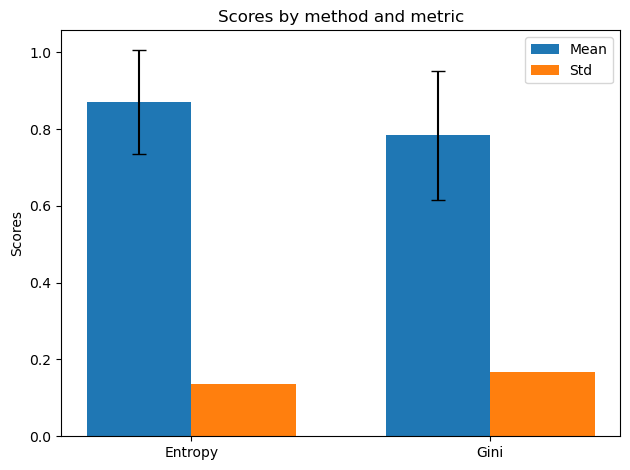

In [24]:
# Calculate mean and standard deviation
mean_entropy = np.mean(accuracies_entropy)
std_entropy = np.std(accuracies_entropy)
mean_gini = np.mean(accuracies_gini)
std_gini = np.std(accuracies_gini)

# Print results
print(f"Entropy - Mean: {mean_entropy}, Std: {std_entropy}")
print(f"Gini - Mean: {mean_gini}, Std: {std_gini}")

# Compare results using a bar chart
labels = ['Entropy', 'Gini']
means = [mean_entropy, mean_gini]
stds = [std_entropy, std_gini]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width, label='Mean', yerr=stds, capsize=5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by method and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


In [15]:
# import json
# from graphviz import Digraph

# # Function to convert a decision tree to a JSON representation
# def tree_to_json(node):
#     if node.is_leaf_node():
#         return {"Leaf": node.value}
#     else:
#         return {
#             "Feature": node.feature,
#             "Threshold": node.threshold,
#             "Left": tree_to_json(node.left),
#             "Right": tree_to_json(node.right)
#         }

# # Function to visualize a decision tree using graphviz
# def visualize_tree(node, graph=None):
#     if graph is None:
#         graph = Digraph()
#         graph.node(name=str(node), label=f"Feature {node.feature}\n<= {node.threshold}")

#     if node.is_leaf_node():
#         graph.node(name=str(node) + "L", label=f"Leaf: {node.value}")
#         graph.edge(str(node), str(node) + "L")
#     else:
#         graph.node(name=str(node.left), label=f"Feature {node.left.feature}\n<= {node.left.threshold}")
#         graph.node(name=str(node.right), label=f"Feature {node.right.feature}\n<= {node.right.threshold}")
#         graph.edge(str(node), str(node.left))
#         graph.edge(str(node), str(node.right))
#         if not node.left.is_leaf_node():
#             visualize_tree(node.left, graph)
#         if not node.right.is_leaf_node():
#             visualize_tree(node.right, graph)
#     return graph

# # Example usage:
# # Assuming 'root' is the root node of your decision tree
# # Convert the tree to JSON
# tree_json = tree_to_json(clf.root)
# # Save the JSON to a file

# # Visualize the tree
# tree_graph = visualize_tree(clf.root)
# tree_graph.render('tree2', view=True)


'tree2.pdf'

In [15]:
clf.print_tree()

Split on feature 5 <= C1007251739:
  Leaf node with value: 1
  Split on feature 4 <= 716.3:
    Split on feature 3 <= 2684.69:
      Split on feature 2 <= 181.0:
        Split on feature 1 <= PAYMENT:
          Leaf node with value: 0
          Leaf node with value: 1
        Split on feature 7 <= 132842.64:
          Split on feature 6 <= 0.0:
            Split on feature 0 <= 1:
              Leaf node with value: 0
              Leaf node with value: 0
            Leaf node with value: 0
          Leaf node with value: 0
      Leaf node with value: 0
    Leaf node with value: 0


In [12]:

arr = np.array([[1, 2, 3], [4, 5, 6]])
arr.shape

(2, 3)

In [19]:
def print_tree(tree):
    if clf.root.is_leaf_node():
        print(clf.root.value)
    else:
        print()

In [15]:
def print_tree(tree, node=None, indent=""):
    if node is None:
        node = tree.root

    if node.is_leaf_node():
        print(f"{indent}Leaf node with value: {node.value}")
    else:
        if isinstance(node.threshold, str):
            print(f"{indent}Split on feature {node.feature} = {node.threshold}:")
        else:
            print(f"{indent}Split on feature {node.feature} <= {node.threshold}:")
            
        print_tree(tree, node.left, indent + "-")
        print_tree(tree, node.right, indent + "-")


In [21]:
print_tree(clf)